In [1]:
%matplotlib inline
from goatools.associations import read_ncbi_gene2go
import matplotlib.pyplot as plt
import numpy as np

/Users/nicochaves/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
gene2go_file_path = '../data/gene2go.txt' # If file doesn't exist, then run gene2go = download_ncbi_associations()
rpkm_file_path = '../../CS341_Data/transcript_rpkm_in_go_nonzero_exp.txt'
gene_count_file_path = '../data/supp_GO_term_gene_counts.txt'
biomart_file_path = '../data/biomart_ensembl_to_entrez.txt'

In [32]:
exp_ev_codes = ['EXP', 'IDA', 'IPI', 'IMP', 'IGI', 'IEP']
comp_an_ev_codes = ['ISS', 'ISO', 'ISA', 'ISM', 'IGC', 'IBA', 'IBD', 'IKR', 'IRD', 'RCA']
auth_stmt_ev_codes = ['TAS', 'NAS']
cur_ev_codes = ['IC', 'ND']
elec_ev_codes = ['IEA']

In [13]:
def print_histogram(GO_terms, title, bin_range=range(0,110,10)):
    counts = [len(genes) for (GO_id, genes) in GO_terms]
    plt.hist(counts, bins=bin_range)
    plt.title(title)
    plt.xlabel("# of Genes")
    plt.ylabel("# of GO terms")
    plt.show()

In [4]:
def map_entrez_to_ensembl(path):
    ent_to_ens = {}
    f = open(path)
    for line in f:
        vals = line.split('\t')
        ens_gene_id = vals[0]
        entrez_id = vals[2]
        ent_to_ens[entrez_id] = ens_gene_id

    f.close()
    return ent_to_ens

In [5]:
def get_go_terms(biomart_fpath, gene2go_fpath, gene_count_fpath, ev_codes=None):
    
    entrez_to_ensembl = map_entrez_to_ensembl(biomart_fpath)

    # taxids=[9606] means select only human.
    if ev_codes:
        go_to_entrez_ids_human = read_ncbi_gene2go(gene2go_fpath, taxids=[9606], go2geneids=True, evidence_set=ev_codes)
    else:
        go_to_entrez_ids_human = read_ncbi_gene2go(gene2go_fpath, taxids=[9606], go2geneids=True)
    print("{N} GO terms associated with human NCBI Entrez GeneIDs".format(N=len(go_to_entrez_ids_human)))

    # Get the GO terms
    gene_cnt_file = open(gene_count_fpath)
    GO_ids = []
    atLine = 0
    skipLines = 1
    for line in gene_cnt_file:
        if atLine < skipLines:
            atLine += 1
            continue
        GO_id = line.split('\t')[0]
        entrez_ids = go_to_entrez_ids_human[GO_id]
        #print '# of Entrez IDs associated with ', GO_id, ' = ', len(entrez_ids)
        ensembl_ids = []
        for ent_id in entrez_ids:
            if str(ent_id) in entrez_to_ensembl:
                ensembl_ids.append(entrez_to_ensembl[str(ent_id)])
        GO_ids.append((GO_id, ensembl_ids))
        #print '# of Ensembl IDs associated with ', GO_id, ' = ', len(ensembl_ids)

    return GO_ids


## All annotations (no filter by evidence)

16439 GO terms associated with human NCBI Entrez GeneIDs
6172


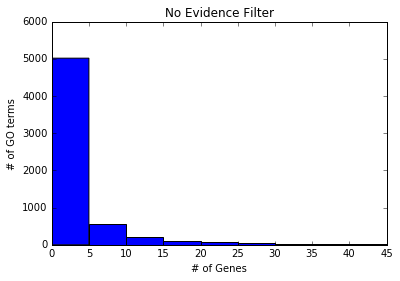

In [19]:
# Get all GO terms from the supplementary file, along with their corresponding ensemble gene IDs.
all_GO_terms = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path)
print len(all_GO_terms)
print_histogram(all_GO_terms, 'No Evidence Filter', bin_range=range(0,50,5))

## Only experimental evidence-based annotations.

10176 GO terms associated with human NCBI Entrez GeneIDs
6172


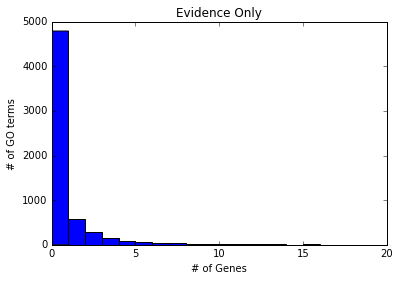

In [22]:
evidence_GO_terms = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path, ev_codes=exp_ev_codes)
print len(evidence_GO_terms)
print_histogram(evidence_GO_terms, 'Exp Evidence Only', bin_range=range(0,20,1))

## Experimental Evidence + Computational Analysis annotations.

12880 GO terms associated with human NCBI Entrez GeneIDs
6172


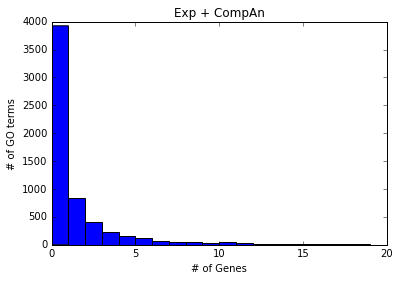

In [25]:
ev_compan_GO_terms = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path, ev_codes=exp_ev_codes + comp_an_ev_codes)
print len(ev_compan_GO_terms)
print_histogram(ev_compan_GO_terms, 'Exp + CompAn', bin_range=range(0,20,1))

## Experimental Evidence + Computational Analysis + Author Statement annotations.

13884 GO terms associated with human NCBI Entrez GeneIDs
6172


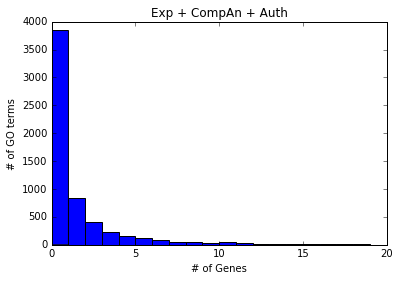

In [28]:
codes = exp_ev_codes + comp_an_ev_codes + auth_stmt_ev_codes
GO_terms_3 = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path, ev_codes=codes)
print len(GO_terms_3)
print_histogram(GO_terms_3, 'Exp + CompAn + Auth', bin_range=range(0,20,1))

## Experimental Evidence + Computational Analysis + Author Statement + Curatorial annotations.

13944 GO terms associated with human NCBI Entrez GeneIDs
6172


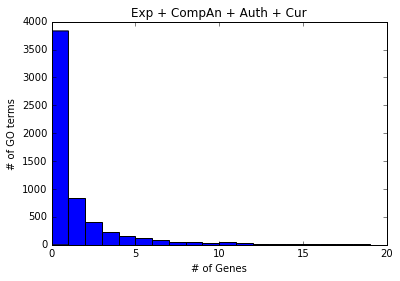

In [31]:
codes = exp_ev_codes + comp_an_ev_codes + auth_stmt_ev_codes + cur_ev_codes
GO_terms_4 = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path, ev_codes=codes)
print len(GO_terms_4)
print_histogram(GO_terms_4, 'Exp + CompAn + Auth + Cur', bin_range=range(0,20,1))

## Experimental Evidence + Computational Analysis + Author Statement + Curatorial + Electronic annotations.

16439 GO terms associated with human NCBI Entrez GeneIDs
6172


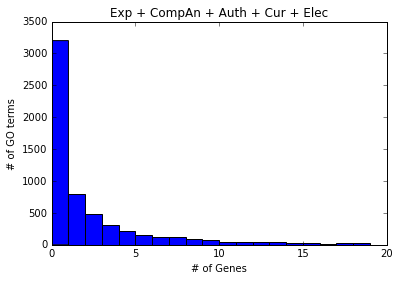

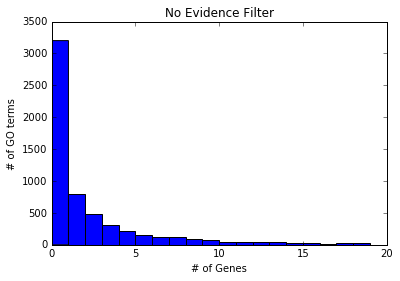

In [34]:
codes = exp_ev_codes + comp_an_ev_codes + auth_stmt_ev_codes + cur_ev_codes + elec_ev_codes
GO_terms_5 = get_go_terms(biomart_file_path, gene2go_file_path, gene_count_file_path, ev_codes=codes)
print len(GO_terms_5)
print_histogram(GO_terms_5, 'Exp + CompAn + Auth + Cur + Elec', bin_range=range(0,20,1))
print_histogram(all_GO_terms, 'No Evidence Filter', bin_range=range(0,20,1))